In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding="latin1")
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
df.shape

(5572, 5)

In [4]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement 
# Website
# Deploy

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
#rename the columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.sample(5)


,target,text
5468,spam,URGENT! Last weekend's draw shows that you hav...
2947,ham,Nope but i'll b going 2 sch on fri quite early...
1300,ham,Those cocksuckers. If it makes you feel better...
1757,ham,"Miss ya, need ya, want ya, love ya."
170,ham,"Sir, I need AXIS BANK account no and bank addr..."


In [8]:
# convert ham into 0 and spam into 1 in target 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,text
3551,0,Lol u still feeling sick?
4478,0,Erutupalam thandiyachu
3566,1,Collect your VALENTINE'S weekend to PARIS inc ...
5551,0,Wen did you get so spiritual and deep. That's ...
2696,0,Nope but i'm going home now then go pump petro...


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [13]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

## EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

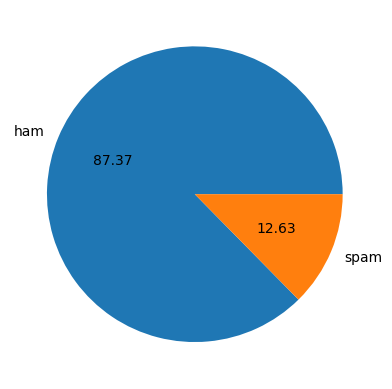

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
#Data is imballance
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # needed for newer NLTK versions


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
#  no characters in columns
df['num_character']=df['text'].apply(len)

In [21]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# nums of words
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#no of sentences
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_character','num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#ham 
df[df['target']==0][['num_character','num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam
df[df['target']==1][['num_character','num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

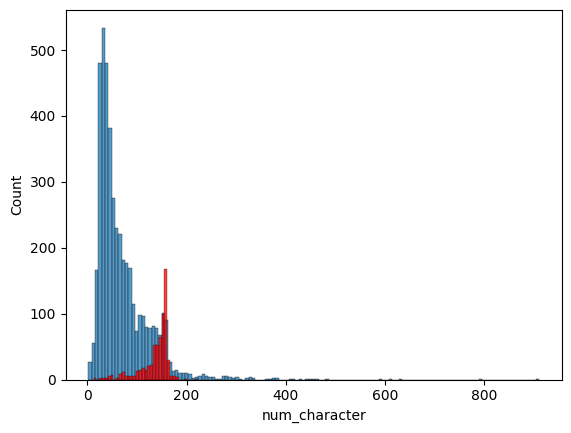

In [28]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

plt.show()

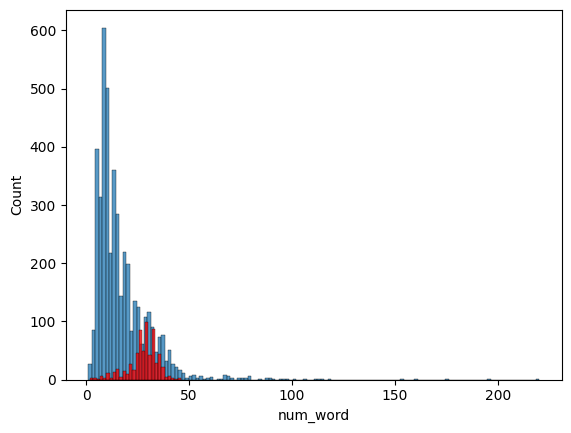

In [29]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

plt.show()

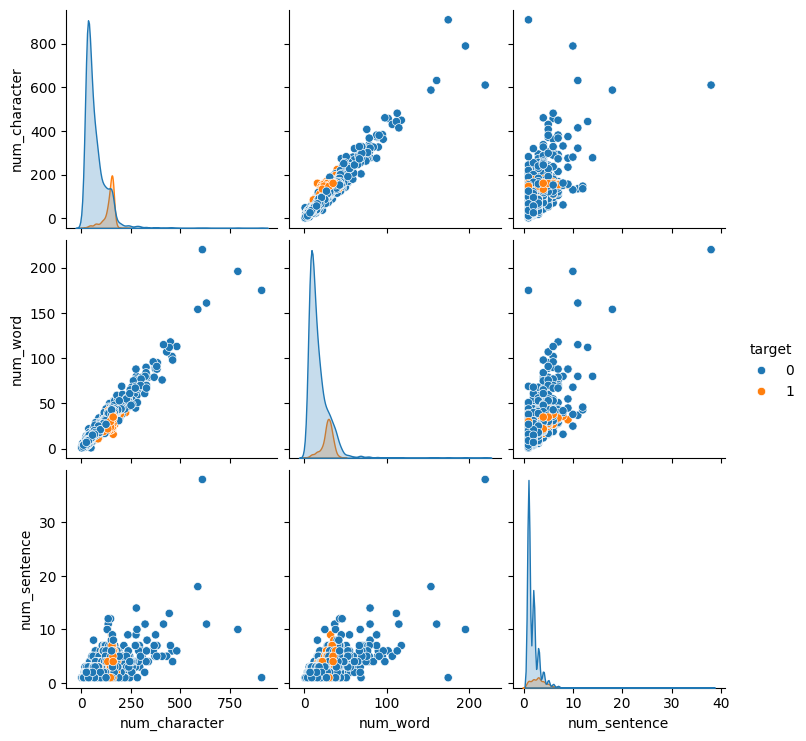

In [30]:
sns.pairplot(df,hue='target')

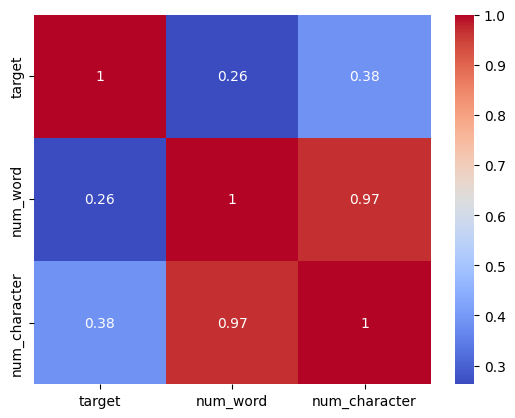

In [31]:
# sns.heatmap(df.corr(),annot=True)

sns.heatmap(df[['target', 'num_word', 'num_character']].corr(), annot=True, cmap='coolwarm')
plt.show()


# Data Preprocessing
## lower case
## tokenization
## removing special character
## removing stop words and panctuation
## stemming

In [32]:
# def transform_txt(text):
#     text=text.lower()
#     text=nltk.word_tokenize(text)
#     y=[]
#     for i in text:
#         if i.isalnum():
#           y.append(i)
#     text=y[:]
#     y.clear()
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
      
# text=y[:]
# y.clear()
# for i in text:
#     y.append(ps.stem(i))
      
      
# return "".join(y)
    

def transform_txt(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)




In [33]:
# transform_txt("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. ")
transform_txt("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


NameError: name 'stopwords' is not defined

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_txt']=df['text'].apply(transform_txt)

In [ ]:
df.head()

,target,text,num_character,num_word,num_sentence,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


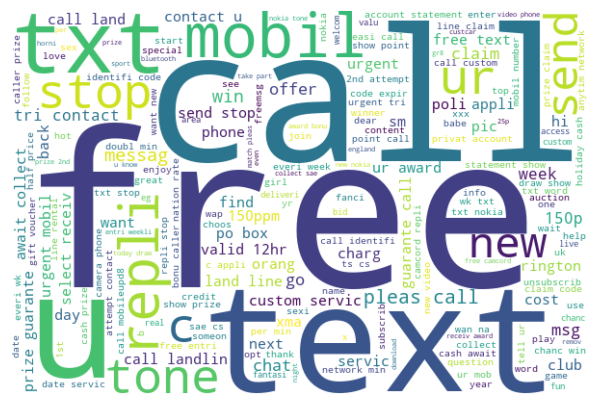

In [ ]:
# 1) Convert lists to strings in transformed_txt
df['transformed_txt'] = df['transformed_txt'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# 2) Create one big spam text string
spam_text = " ".join(df[df['target']==1]['transformed_txt'].values)

# 3) Generate word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=600, height=400, background_color='white')
spam_wc = wc.generate(spam_text)

# 4) Show it
plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()


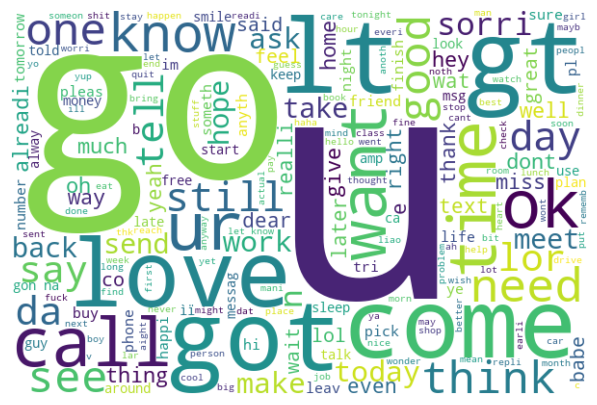

In [ ]:
# 1) Convert lists to strings in transformed_txt
df['transformed_txt'] = df['transformed_txt'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# 2) Create one big ham text string
ham_text = " ".join(df[df['target']==0]['transformed_txt'].values)

# 3) Generate word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=600, height=400, background_color='white')
ham_wc = wc.generate(ham_text)

# 4) Show it
plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
df.head()

,target,text,num_character,num_word,num_sentence,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

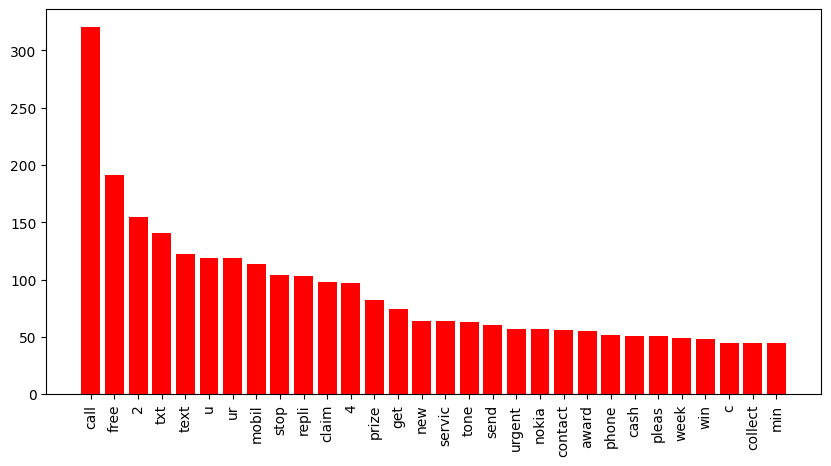

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize=(10,5))
plt.bar(temp[0], temp[1],color='red')     # <-- same column usage as your code
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [ ]:
len(ham_corpus)

35404

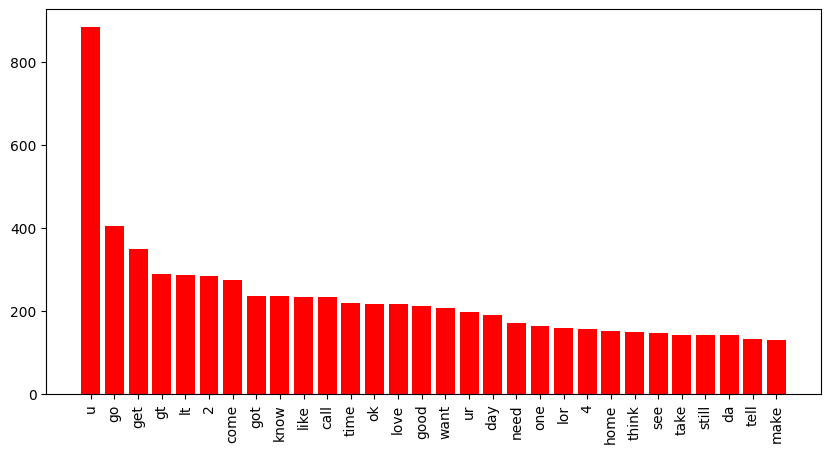

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.DataFrame(Counter(ham_corpus).most_common(30))

plt.figure(figsize=(10,5))
plt.bar(temp[0], temp[1],color='red')     # <-- same column usage as your code
plt.xticks(rotation='vertical')
plt.show()


# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Remove rows where transformed_txt is empty or just whitespace
df = df[df['transformed_txt'].str.strip() != ""]
tfidf=TfidfVectorizer(max_features=3000)
cv = CountVectorizer()
X = tfidf.fit_transform(df['transformed_txt']).toarray()


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


In [ ]:
# appending the num_character col to X
# X = np.hstack((X,df['num_character'].values.reshape(-1,1)))


In [ ]:
cv = CountVectorizer(min_df=1)


In [ ]:
df['transformed_txt'].head(10)


0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
5    freemsg hey darl 3 week word back like fun sti...
6        even brother like speak treat like aid patent
7    per request mell oru minnaminungint nurungu ve...
8    winner valu network custom select receivea pri...
9    mobil 11 month u r entitl updat latest colour ...
Name: transformed_txt, dtype: object

In [ ]:
X.shape

(5160, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5160,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=2)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)



MultinomialNB()

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.876937984496124
[[800 106]
 [ 21 105]]
0.4976303317535545


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738372093023255
[[906   0]
 [ 27  99]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.876937984496124
[[800 106]
 [ 21 105]]
0.4976303317535545


In [ ]:
#tfidf-->mnb

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9757751937984496, 0.9809523809523809)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9809523809523809
For  KN
Accuracy -  0.9244186046511628
Precision -  1.0
For  NB
Accuracy -  0.9738372093023255
Precision -  1.0
For  DT
Accuracy -  0.937984496124031
Precision -  0.7870370370370371
For  LR
Accuracy -  0.9593023255813954
Precision -  0.9468085106382979
For  RF
Accuracy -  0.9709302325581395
Precision -  0.9897959183673469
For  AdaBoost
Accuracy -  0.9205426356589147
Precision -  0.775
For  BgC
Accuracy -  0.9525193798449613
Precision -  0.808
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9724770642201835
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9166666666666666
For  xgb
Accuracy -  0.9680232558139535
Precision -  0.911504424778761


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.924419,1.000000
2,NB,0.973837,1.000000
5,RF,0.970930,0.989796
0,SVC,0.975775,0.980952
8,ETC,0.977713,0.972477
4,LR,0.959302,0.946809
9,GBDT,0.955426,0.916667
10,xgb,0.968023,0.911504
7,BgC,0.952519,0.808000
3,DT,0.937984,0.787037


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [ ]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.924419
1,NB,Accuracy,0.973837
2,RF,Accuracy,0.970930
3,SVC,Accuracy,0.975775
4,ETC,Accuracy,0.977713
5,LR,Accuracy,0.959302
6,GBDT,Accuracy,0.955426
7,xgb,Accuracy,0.968023
8,BgC,Accuracy,0.952519
9,DT,Accuracy,0.937984


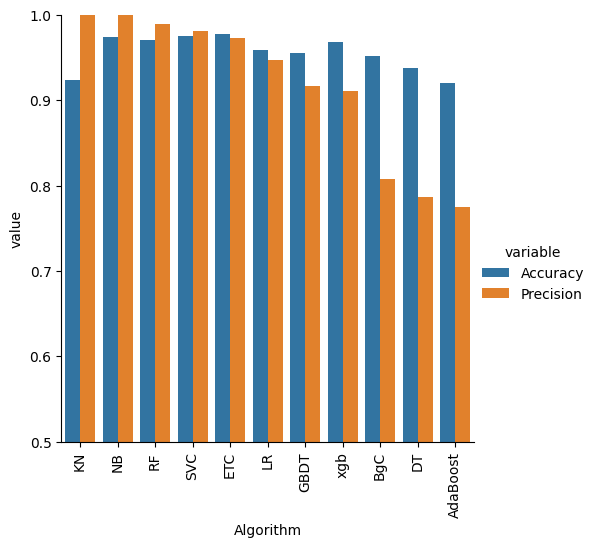

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()



# Model Improving

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.924419,1.000000,0.924419,1.000000,0.924419,1.000000,0.924419,1.000000
1,NB,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000
2,RF,0.970930,0.989796,0.970930,0.989796,0.970930,0.989796,0.970930,0.989796
3,SVC,0.975775,0.980952,0.975775,0.980952,0.975775,0.980952,0.975775,0.980952
4,ETC,0.977713,0.972477,0.977713,0.972477,0.977713,0.972477,0.977713,0.972477
5,LR,0.959302,0.946809,0.959302,0.946809,0.959302,0.946809,0.959302,0.946809
6,GBDT,0.955426,0.916667,0.955426,0.916667,0.955426,0.916667,0.955426,0.916667
7,xgb,0.968023,0.911504,0.968023,0.911504,0.968023,0.911504,0.968023,0.911504
8,BgC,0.952519,0.808000,0.952519,0.808000,0.952519,0.808000,0.952519,0.808000
9,DT,0.937984,0.787037,0.937984,0.787037,0.937984,0.787037,0.937984,0.787037


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9815891472868217
Precision 0.9908256880733946


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9854651162790697
Precision 0.9743589743589743


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Fit vectorizer on full text data
tfidf = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = tfidf.fit_transform(df['text'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=2)

# Train model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# ✅ Save both model and vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
